references
https://largecats.github.io/blog/2019/06/20/ocr-with-comics/

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
import os
import csv

In [123]:
# find all speech bubbles in the given comic page and return a list of cropped speech bubbles (with possible false positives)
def findSpeechBubbles(imagePath, method = 'simple'):
    # read image
    image = cv2.imread(imagePath)
    # gray scale
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # filter noise
    imageGrayBlur = cv2.GaussianBlur(imageGray,(3,3),0)
    if method != 'simple':
        # recognizes more complex bubble shapes
        imageGrayBlurCanny = cv2.Canny(imageGrayBlur,100,500)
        binary = cv2.threshold(imageGrayBlurCanny,150,255,cv2.THRESH_BINARY)[1]
    else:
        # recognizes only rectangular bubbles
        binary = cv2.threshold(imageGrayBlur,150,255,cv2.THRESH_BINARY)[1]
    # find contours
    contours = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]
    # get the list of cropped speech bubbles
    #contours = contours[0]
    croppedImageList = []
    for contour in contours:
        rect = cv2.boundingRect(contour)
        [x, y, w, h] = rect
        # filter out speech bubble candidates with unreasonable size
        if w < 500 and w > 60 and h < 500 and h > 25:
            croppedImage = image[y:y+h, x:x+w]
            croppedImageList.append(croppedImage)

    return croppedImageList

In [124]:
# apply the ocr engine to the given image and return the recognized script where illegitimate characters are filtered out
def imagetesseract(image):
    script = pytesseract.image_to_string(image, lang = 'eng')
    for char in script:
        if char not in ' -QWERTYUIOPASDFGHJKLZXCVBNMqwertyuiopasdfghjklzxcvbnm,.?!1234567890"":;\'':
            script = script.replace(char,'')
    
    return script

In [125]:
imagePath = 'C:\\Users\\HP\\Desktop\\worksapces\\image-editing\\images\\cartoon1.jpg'

In [126]:
croppedImageList = findSpeechBubbles(imagePath)

In [127]:
len(croppedImageList)

25

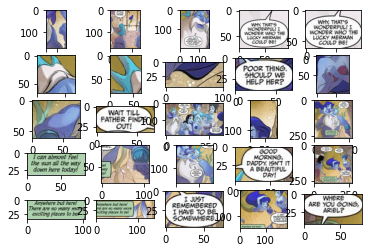

In [129]:
n=1
for x in croppedImageList:
    plt.subplot(5,5,n)
    plt.imshow(x)
    n+=1